# **Classification Metrics Exercise 2 (Practice)**

## Assignment:

We will use [this dataset](https://assets.codingdojo.com/boomyeah2015/codingdojo/curriculum/content/chapter/bank_modified.csv). The data, which was modified from [this source](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing), has information about direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. The goal is to predict if the client will subscribe (yes: 1 or no: 0) to a term deposit (the target column is called 'y_yes' in this csv).



In [ ]:
# import libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, \
classification_report, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

'''
## Numpy
import numpy as np
## MatPlotLib
import matplotlib.pyplot as plt

## Preprocessing
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

## Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## Regression Metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


## Set global scikit-learn configuration 
from sklearn import set_config
## Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}

from IPython.core.display import clear_output
'''

"\n## Numpy\nimport numpy as np\n## MatPlotLib\nimport matplotlib.pyplot as plt\n\n## Preprocessing\nfrom sklearn.compose import make_column_selector, make_column_transformer\nfrom sklearn.preprocessing import StandardScaler, OneHotEncoder\n\n## Models\nfrom sklearn.tree import DecisionTreeRegressor\nfrom sklearn.ensemble import RandomForestRegressor\n\n## Regression Metrics\nfrom sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error\n\n\n## Set global scikit-learn configuration \nfrom sklearn import set_config\n## Display estimators as a diagram\nset_config(display='diagram') # 'text' or 'diagram'}\n\nfrom IPython.core.display import clear_output\n"

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# load data
path = '/content/drive/MyDrive/Coding Dojo/07 Week 7: Classification Models/bank_modified.csv'
df = pd.read_csv(path)

In [ ]:
# inspect data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  4521 non-null   int64
 1   balance              4521 non-null   int64
 2   duration             4521 non-null   int64
 3   campaign             4521 non-null   int64
 4   pdays                4521 non-null   int64
 5   previous             4521 non-null   int64
 6   job_blue-collar      4521 non-null   int64
 7   job_entrepreneur     4521 non-null   int64
 8   job_housemaid        4521 non-null   int64
 9   job_management       4521 non-null   int64
 10  job_retired          4521 non-null   int64
 11  job_self-employed    4521 non-null   int64
 12  job_services         4521 non-null   int64
 13  job_student          4521 non-null   int64
 14  job_technician       4521 non-null   int64
 15  job_unemployed       4521 non-null   int64
 16  job_unknown          452

In [ ]:
# inspect data
df.sample(10)

,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,y_yes
1459,31,433,1504,2,-1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
550,54,211,200,2,-1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
66,31,338,155,1,-1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1428,42,292,222,3,-1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3657,56,3337,99,3,-1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3177,32,11797,95,2,-1,0,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0
3907,36,1318,100,2,-1,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
92,27,-195,391,1,-1,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,1
2961,32,1787,87,4,357,4,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
765,37,414,293,2,162,4,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
# inspect data
df.describe()

,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,y_yes
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,...,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,263.961292,2.793630,39.766645,0.542579,0.209246,0.037160,0.024773,0.214333,...,0.008405,0.618668,0.264543,0.510064,0.298607,0.041363,0.016810,0.566025,0.152842,0.115240
std,10.576211,3009.638142,259.856633,3.109807,100.121124,1.693562,0.406815,0.189174,0.155451,0.410404,...,0.091304,0.485767,0.441138,0.499954,0.457697,0.199149,0.128575,0.495676,0.359875,0.319347
min,19.000000,-3313.000000,4.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,69.000000,104.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,444.000000,185.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,49.000000,1480.000000,329.000000,3.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,87.000000,71188.000000,3025.000000,50.000000,871.000000,25.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# check for duplicates
df.duplicated().sum()

0

In [ ]:
# assign target variable (y) and feature matrix (X)
target = 'y_yes'
y = df[target]
X = df.drop(columns = target)

In [ ]:
# check
print(f"y:\n{y}")
print()
print(f"X:\n{X}")

y:
0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: y_yes, Length: 4521, dtype: int64

X:
      age  balance  duration  campaign  pdays  previous  job_blue-collar  \
0      30     1787        79         1     -1         0                0   
1      33     4789       220         1    339         4                0   
2      35     1350       185         1    330         1                0   
3      30     1476       199         4     -1         0                0   
4      59        0       226         1     -1         0                1   
...   ...      ...       ...       ...    ...       ...              ...   
4516   33     -333       329         5     -1         0                0   
4517   57    -3313       153         1     -1         0                0   
4518   57      295       151        11     -1         0                0   
4519   28     1137       129         4    211         3                1   
4520   

In [ ]:
# validate model (train/test split)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
# check
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X_train: (3390, 25)
X_test: (1131, 25)
y_train: (3390,)
y_test: (1131,)


Your task is to:



1. Build a DummyClassifier baseline model and a logistic regression model to predict whether or not a client will subscribe.



In [ ]:
# building a DummyClassifier is not necessary; in this binary classification problem,
# we can see with value_counts (below) that the majority of customers do NOT
# subscribe. A DummyClassifier would predict, for each customer, that they
# take the most common action, which is to not subscribe. So, our DummyClassifier
# would be correct 88.476% of the time.

df['y_yes'].value_counts(normalize = True)

0    0.88476
1    0.11524
Name: y_yes, dtype: float64

In [ ]:
# instantiate logistic regression default model
logreg_def = LogisticRegression()

In [ ]:
# create logistic regression default model pipeline
logreg_def_pipe = make_pipeline(StandardScaler(), logreg_def)

In [ ]:
# fit the logistic regression default model pipeline on training data only
logreg_def_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

2. Use GridSearchCV to tune the logistic regression model's hyperparameters to get the best model possible.



In [ ]:
# create logistic regression tuned model pipeline
logreg_tuned_pipe = make_pipeline(StandardScaler(), LogisticRegression())

In [ ]:
# get parameters for GridSearchCV
logreg_tuned_pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('logisticregression', LogisticRegression())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'logisticregression': LogisticRegression(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__l1_ratio': None,
 'logisticregression__max_iter': 100,
 'logisticregression__multi_class': 'auto',
 'logisticregression__n_jobs': None,
 'logisticregression__penalty': 'l2',
 'logisticregression__random_state': None,
 'logisticregression__solver': 'lbfgs',
 'logisticregression__tol': 0.0001,
 'logisticregression__verbose': 0,
 'logisticregression__warm_start': False}

In [ ]:
# create parameter grid for GridSearchCV parameter tuning
param_grid = {'logisticregression__C': [.00001, .0001, .001, .01, .1, 1, 10, 100, 1000, 10000],
              'logisticregression__penalty': ['l1', 'l2', 'elasticnet', None],
              'logisticregression__solver': ['lbfgs', 'liblinear', 'sag', 'saga', 'newton-cg', 'newton-cholesky'],
              'logisticregression__max_iter': [1, 100, 1000]}

In [ ]:
# instantiate grid search object
logreg_grid_search = GridSearchCV(logreg_tuned_pipe, param_grid)

In [ ]:
# fit grid search on training data
logreg_grid_search.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': [1e-05, 0.0001, 0.001, 0.01,
                                                   0.1, 1, 10, 100, 1000,
                                                   10000],
                         'logisticregression__max_iter': [1, 100, 1000],
                         'logisticregression__penalty': ['l1', 'l2',
                                                         'elasticnet', None],
                         'logisticregression__solver': ['lbfgs', 'liblinear',
                                                        'sag', 'saga',
                                                        'newton-cg',
                                                        'newton-cholesky']})

In [ ]:
# get best parameters from grid search
logreg_grid_search.best_params_

{'logisticregression__C': 100,
 'logisticregression__max_iter': 1,
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'saga'}

In [ ]:
# instantiate tuned model
logreg_tuned_pipe = logreg_grid_search.best_estimator_

In [ ]:
# fit the tuned model on training data only
logreg_tuned_pipe.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=100, max_iter=1, solver='saga'))])

3. Then, calculate the following classification metrics for both models:



Metrics to calculate:

- Accuracy
- Precision
- Recall
- ROC AUC
- Create a Confusion Matrix
- Additionally, plot the ROC.

In [ ]:
# define a metrics function
def metrics(model_pipe, X_train, X_test, y_train, y_test, name):

  # model name
  print(f"{name} Metrics:")

  # create predictions
  test_pred = model_pipe.predict(X_test)

  # accuracy
  print(f"Accuracy: {accuracy_score(y_test, test_pred)}")

  # precision
  print(f"Precision: {precision_score(y_test, test_pred)}")
  
  # recall
  print(f"Recall: {recall_score(y_test, test_pred)}")

  # confusion matrix
  ConfusionMatrixDisplay.from_predictions(y_test, 
                                          test_pred, 
                                          normalize = 'true', 
                                          cmap = 'Greens')
  
  # ROC AUC
  print(f"ROC AUC: {roc_auc_score(y_test, model_pipe.predict_proba(X_test)[:,1])}")
  
  # plot ROC
  RocCurveDisplay.from_estimator(model_pipe, X_train, y_train)

  # add baseline to ROC
  plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')

  # add legend to plot
  plt.legend();

Logistic Regression Default Model Metrics:
Accuracy: 0.8992042440318302
Precision: 0.5964912280701754
Recall: 0.272
ROC AUC: 0.8588548707753478


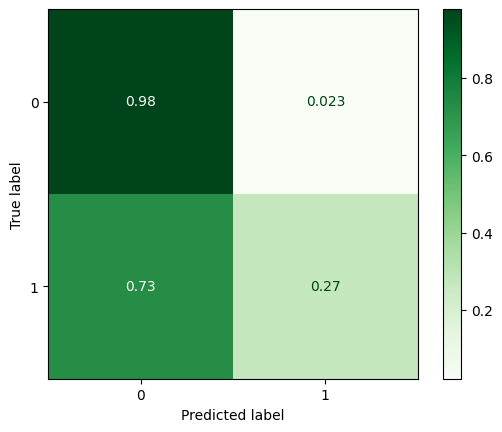

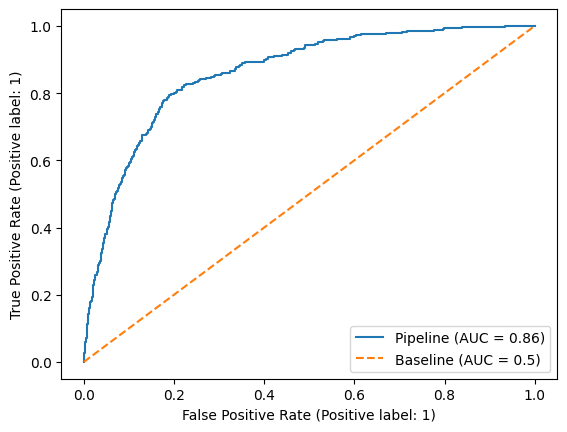

In [ ]:
# calculate metrics for logistic regression default model
logreg_def_metrics = metrics(logreg_def_pipe, 
                             X_train, 
                             X_test, 
                             y_train, 
                             y_test, 
                             "Logistic Regression Default Model")

Logistic Regression Tuned Model Metrics:
Accuracy: 0.8956675508399646
Precision: 0.574468085106383
Recall: 0.216
ROC AUC: 0.849192842942346


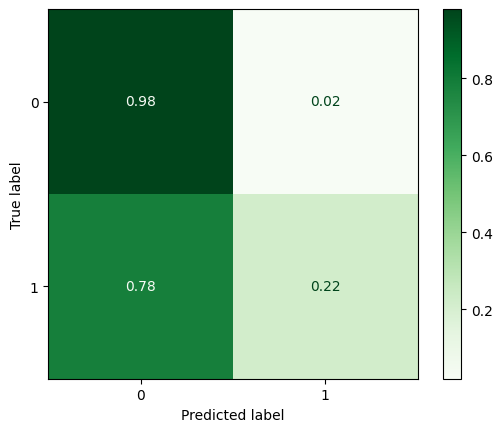

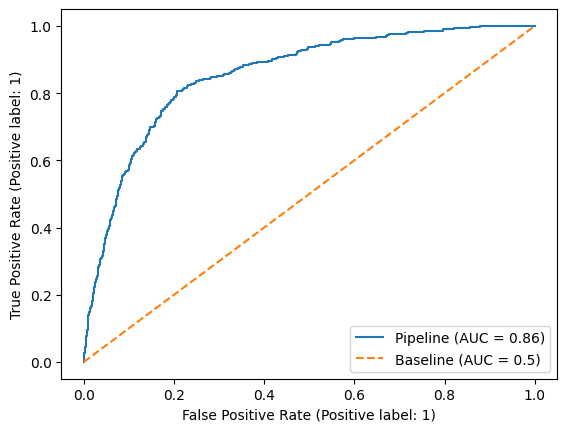

In [ ]:
# calculate metrics for logistic regression tuned model
logreg_tuned_metrics = metrics(logreg_tuned_pipe, 
                               X_train, 
                               X_test, 
                               y_train, 
                               y_test, 
                               "Logistic Regression Tuned Model")

## Questions to Think About and Answer:

After completing the task, answer the following questions:



1. Which metric is going to be best to evaluate your classification model for this dataset and why? Hint: think about what each metric means in this specific scenario. What metric is going to help the bank the most?


Metrics and the problem:

1. False positives: the model flagged a customer as one who will subscribe but the customer doesn't.
2. False negatives: the model didn't think a customer would subscribe but they would have. 

In this case, the company probably wants false negatives to be minimized. If there is a false negative, the company experiences a loss of potential revenue. But, if there is a false positive, the only cost to the company is calling a customer who ends up not subscribing. Here, I'm assuming that the cost to call a customer who does not subscribe is less important to the company than the subscriber who didn't subscribe because they weren't called. 

Based on my reasoning above, the metric I'll use to evaluate the models here is recall. Recall minimizes false negatives at the expense of false positives. 

**The default logistic regression model has the higher accuracy and the higher recall, compared to the tuned logistic regression model.**

From the solutions notebook:
Sensitivity (the true positive rate) describes the percentage of customers that do subscribe that we correctly predicted would subscribe.

- high sensitivity = correctly predicting people that do subscribe
- low sensitivity = predicting people will not subscribe when they will

A low sensitivity means we could potentially be missing out on customers who actually will subscribe but we predict they will not subscribe.

Specificity (the true negative rate) describes the percentage of customers that do not subscribe that we correctly predicted would not subscribe.

- high specificity = correctly predicting people that do not subscribe
- low specificity = predicting people will subscribe when they do not

A low specificity means we could potentially be wasting marketing materials by marketing to people we predict will subscribe but they actually do not.

Because of this, the metric to optimize for depends on the bank's goal. We probably do not want to overlook customers that will end up subscribing, so optimizing for sensitivity makes sense in this case.

2. Compare your model's accuracy with the baseline model. Do you see any problems here?

Solutions notebook says:
- Since the accuracy of the logistic regression models is only slightly better than the dummy model, they are not very good models.

3. What are other ways you could improve this model?

- add in cross-validation
- deal with the data being imbalanced

## Solutions:

[Assignment Solutions](https://github.com/coding-dojo-data-science/machine-learning-practice-solutions/blob/main/Classification_Metrics_2_Solutions.ipynb)